# EDA Project  (Implemented Different ML Algorithms)
# Sklearn, Matplotlib, Pandas, Seaborn, Numpy, Scipy

#### Exploratory analysis using Statistics and visualization
#### Classification using all major supervised ML algorithms 

#### Dataset used can be downloaded from-
https://www.kaggle.com/carlolepelaars/toy-dataset 

In [1]:
#-----------------------------------------------------
# IMPORTING LIBRARIES
#-----------------------------------------------------

# For number manipulation and management
import numpy as np

# For visualization
import matplotlib.pyplot as plt

# For data management
import pandas as pd

# For visualization
import seaborn as sns

# Plotting ROC with sklearn
import scikitplot as skplt

# For unbiased training
from sklearn.model_selection import cross_val_score

# For classification metrices
from sklearn.metrics import accuracy_score, precision_score, classification_report

# For statistical tools
from scipy import stats

# For encoding data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



In [2]:
#-----------------------------------------------------
# IMPORTING DATASETS
#-----------------------------------------------------

# Importing the dataset
dataset = pd.read_csv('toy_dataset.csv')

# Extracting features and labels-
X = dataset.iloc[:, 1:5].values
y = dataset.iloc[:, 5:6].values

In [4]:
#-----------------------------------------------------
# DATA EXPLORATION-
#-----------------------------------------------------

# Check for NULL Values-
print(dataset.isnull().values.any()) # function of pandas as 'dataset' is of type pd.dataframe

# To check the dimension of our data
print(np.ndim(X)) #2D

# No of values in the 2D array
print(np.size(X))

# Check type
print(X.dtype)

# Info about datatype
#print(np.info('float64'))

False
2
600000
object


In [5]:
# Basic Descriptive statistics of data-
print(dataset.describe())
# See negative value in salary
# We should remove the Negative value

# Changing all negative values to in salary to positive-
dataset['Income'] = dataset['Income'].abs()

# Since we have numpy array 
# So to check the unique values we'll need to change them to pandas series-
No_of_unique_values_City = pd.value_counts(pd.Series(X[:, 0]))
print(No_of_unique_values_City)

No_of_unique_values_Gender = pd.value_counts(pd.Series(X[:, 1]))
print(No_of_unique_values_Gender)

No_of_unique_values_Age = pd.value_counts(pd.Series(X[:, 2]))
print(No_of_unique_values_Age)

No_of_unique_values_Income = pd.value_counts(pd.Series(X[:, 3]))
print(No_of_unique_values_Income)
# Certainly income is a continuous variable

              Number            Age         Income
count  150000.000000  150000.000000  150000.000000
mean    75000.500000      44.950200   91252.798273
std     43301.414527      11.572486   24989.500948
min         1.000000      25.000000    -654.000000
25%     37500.750000      35.000000   80867.750000
50%     75000.500000      45.000000   93655.000000
75%    112500.250000      55.000000  104519.000000
max    150000.000000      65.000000  177157.000000
New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
dtype: int64
Male      83800
Female    66200
dtype: int64
26    3918
64    3879
41    3862
43    3862
54    3838
29    3805
28    3798
27    3790
63    3784
44    3782
36    3780
59    3775
47    3773
37    3771
33    3769
58    3762
49    3762
42    3760
32    3759
52    3753
31    3749
48    3743
40    3740
61    3737
38    3734
57    37

In [6]:
#-----------------------------------------------------
# Encoding categorical data-
#-----------------------------------------------------

# LABEL ENCODER------->
# See the different columns and then apply the encoding to the required one-
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
print(labelencoder_X_1.classes_)
print(len(labelencoder_X_1.classes_)) # verified

labelencoder_X_2 = LabelEncoder()
X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1])
print(labelencoder_X_2.classes_)
print(len(labelencoder_X_2.classes_)) # verified

# To check back the original value-
print(labelencoder_X_1.inverse_transform([4]))
print(labelencoder_X_2.inverse_transform([1]))

['Austin' 'Boston' 'Dallas' 'Los Angeles' 'Mountain View' 'New York City'
 'San Diego' 'Washington D.C.']
8
['Female' 'Male']
2
['Mountain View']
['Male']


In [7]:
#-------------------------------

# ONE HOT ENCODER------->
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

# see all categories-
print(onehotencoder.categories_)
print(onehotencoder.active_features_)

# max no of values perfeature
print(onehotencoder.n_values_) # city has 8 unique values

# Lets print X-
print(X)
print(X.dtype)

# to see number of unique labels through pandas-
No_of_unique_values_Label = pd.value_counts(pd.Series(y[:, 0]))

# as we can see that its a string we'll need to change that to numbers with LabelEncoder-
labelencoder_y = LabelEncoder()
y[:, 0] = labelencoder_y.fit_transform(y[:, 0])

# For y- which is our label--
print(y) 
print(y.dtype)  # its of object type, but we have transformed all the value to integers

# converting the Dtype of Y-
y = y.astype(int)



[array([0., 1., 2., 3., 4., 5., 6., 7.])]
[0 1 2 3 4 5 6 7]
[8]
[[0.00000e+00 0.00000e+00 1.00000e+00 ... 1.00000e+00 4.10000e+01
  4.03670e+04]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 1.00000e+00 5.40000e+01
  4.50840e+04]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 1.00000e+00 4.20000e+01
  5.24830e+04]
 ...
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 2.60000e+01
  1.11885e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 2.50000e+01
  1.11878e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 3.70000e+01
  8.72510e+04]]
float64
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
object


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is dep

In [8]:
#-----------------------------------------------------
# Inferential statistics of data-
#-----------------------------------------------------
# Coverting Data into DF format-
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

# Pearson correlation ---

#Age and Salary
print(stats.pearsonr(X_df[9], X_df[10]))
# returns (R-value and P-value)

# Spearman Correlation between Age and Salary
print(X_df[9].corr(X_df[10],method= 'spearman'))

(-0.0013181143630648106, 0.6097015892180192)
-0.0014523311043334762


In [9]:
#-------------------------------

# Conduct a Chi-square test of independence between 2 categorical variables ---
# returns (ChiSquare Value, P-Value, Degree of Freedom, expected frequencies as an array)

# Age and Illness-
crosstab = pd.crosstab(X_df[9], y_df[0])
print(stats.chi2_contingency(crosstab))

# Salary and Illness-
crosstab = pd.crosstab(X_df[10], y_df[0])
print(stats.chi2_contingency(crosstab))

# Gender and Illness-
crosstab = pd.crosstab(X_df[10], y_df[0])
print(stats.chi2_contingency(crosstab))



(53.280658903435686, 0.07792092834057546, 40, array([[1716.82898667,  151.17101333],
       [3600.92932   ,  317.07068   ],
       [3483.28793333,  306.71206667],
       [3490.64052   ,  307.35948   ],
       [3497.07403333,  307.92596667],
       [3429.06260667,  301.93739333],
       [3445.60592667,  303.39407333],
       [3454.79666   ,  304.20334   ],
       [3463.98739333,  305.01260667],
       [3409.76206667,  300.23793333],
       [3361.97025333,  296.02974667],
       [3474.0972    ,  305.9028    ],
       [3465.82554   ,  305.17446   ],
       [3431.81982667,  302.18017333],
       [3377.5945    ,  297.4055    ],
       [3437.33426667,  302.66573333],
       [3549.46121333,  312.53878667],
       [3455.71573333,  304.28426667],
       [3549.46121333,  312.53878667],
       [3475.93534667,  306.06465333],
       [3372.99913333,  297.00086667],
       [3407.00484667,  299.99515333],
       [3467.66368667,  305.33631333],
       [3440.09148667,  302.90851333],
       [3457.55388

In [10]:
#-----------------------------------------------------

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# 80% to train and 20% to test-
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Don't need to scale Y as they are categorical and with only 2 unique numerical values-

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


[0 0 0 ... 0 0 0]
[[27558     0]
 [ 2442     0]]
0.9186
0.0
[[ 0.00854137  0.00776481  0.0155512  -0.01181925 -0.00277877 -0.00818629
  -0.00461438  0.00431064 -0.00299396  0.00923278  0.02365752]]
[-2.43139505]
[0 1]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27558
           1       0.00      0.00      0.00      2442

   micro avg       0.92      0.92      0.92     30000
   macro avg       0.46      0.50      0.48     30000
weighted avg       0.84      0.92      0.88     30000



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


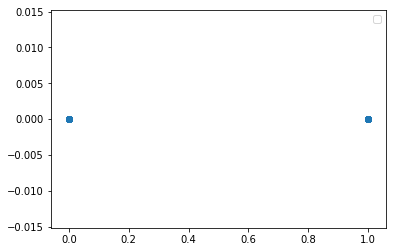

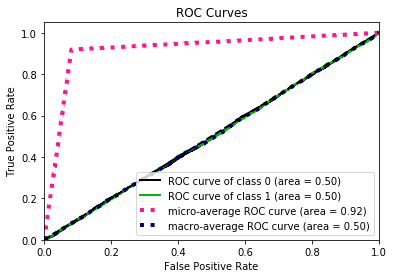

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:43

0.9191916684133681
3.3896263515589756e-05
3.6876164874403895e-05


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#-----------------------------------------------------
# SUPERVISED MACHINE LEARNING ALGORITHMS ---
#-----------------------------------------------------

# Logistic regression (classifier)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotting the points will give NOTHING-
# as they are 0's and 1's -- 
plt.scatter(y_test,y_pred)
plt.legend()

# Accuracy of our model-
print(accuracy_score(y_test, y_pred))

# Precision of our model- 
# FORMULA - tp / (tp + fp)
print(precision_score(y_test, y_pred)) 
# precision is worst as its 0!
# which is proven by confusion matrix

# Check the slope (coefficent) and intercept-
print(classifier.coef_ )  # 11 features-
print(classifier.intercept_)  # bias value added to the decision function
print(classifier.classes_) # No of output classes

# To generate a classification report--
# Here recall is the ratio tp / (tp + fn) 
print(classification_report(y_test, y_pred))

# ROC curve--
y_prob = classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

# Applying k-Fold Cross Validation
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(scores.mean())
print(scores.std())

# Coefficient of Variation (CV)
# if CV>=1 then high variation else CV<1 low variation
print(scores.std()/scores.mean())



In [ ]:
#-----------------------------------------------------

# Support Vector Classifier (Linear kernel)-

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True) 
# probability = True neccesary for predict_prob
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy of our model-
print(accuracy_score(y_test, y_pred))
# Precision of our model- 
# FORMULA - tp / (tp + fp)
print(precision_score(y_test, y_pred)) 

# Check the slope (coefficent) and intercept-
print(classifier.coef_ )  # 11 features-
print(classifier.intercept_)  # bias value added to the decision function

# To generate a classification report--
# Here recall is the ratio tp / (tp + fn) 
print(classification_report(y_test, y_pred))

# ROC curve--
y_prob = classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

# Applying k-Fold Cross Validation
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(scores.mean())
print(scores.std())

# Coefficient of Variation (CV)
# if CV>=1 then high variation else CV<1 low variation
print(scores.std()/scores.mean())



/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#-----------------------------------------------------

# Support Vector Classifier (Rbf kernel)-

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, probability = True)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy of our model-
print(accuracy_score(y_test, y_pred))
# Precision of our model- 
# FORMULA - tp / (tp + fp)
print(precision_score(y_test, y_pred)) 

# Check the intercept- NO slope as its kernel is rbf 
print(classifier.intercept_)  # bias value added to the decision function

# To generate a classification report--
# Here recall is the ratio tp / (tp + fn) 
print(classification_report(y_test, y_pred))

# ROC curve--
y_prob = classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

# Applying k-Fold Cross Validation
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(scores.mean())
print(scores.std())

# Coefficient of Variation (CV)
# if CV>=1 then high variation else CV<1 low variation
print(scores.std()/scores.mean())

In [ ]:
#-----------------------------------------------------

# Naive Bayes classifier-

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy of our model-
print(accuracy_score(y_test, y_pred))
# Precision of our model- 
# FORMULA - tp / (tp + fp)
print(precision_score(y_test, y_pred)) 

# No of training examples to see-
print(classifier.class_count_)
# probability of each class-
print(classifier.class_prior_)

# mean and Variance of each feature per class-
print(classifier.theta_)
print(classifier.sigma_)
# To know the absolute value added to the variance-
print(classifier.epsilon_)

# To generate a classification report--
# Here recall is the ratio tp / (tp + fn) 
print(classification_report(y_test, y_pred))

# ROC curve--
y_prob = classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

# Applying k-Fold Cross Validation
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(scores.mean())
print(scores.std())

# Coefficient of Variation (CV)
# if CV>=1 then high variation else CV<1 low variation
print(scores.std()/scores.mean())



In [ ]:
#-----------------------------------------------------

# Decision Tree Classifier-

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 32)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# List pf importance of all features-
print(classifier.feature_importances_)
print(classifier.tree_)

# Accuracy of our model-
print(accuracy_score(y_test, y_pred))
# Precision of our model- 
# FORMULA - tp / (tp + fp)
print(precision_score(y_test, y_pred)) 

# To generate a classification report--
# Here recall is the ratio tp / (tp + fn) 
print(classification_report(y_test, y_pred))

# ROC curve--
y_prob = classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

# Applying k-Fold Cross Validation
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(scores.mean())
print(scores.std())

# Coefficient of Variation (CV)
# if CV>=1 then high variation else CV<1 low variation
print(scores.std()/scores.mean())



In [ ]:
#-----------------------------------------------------

# Random Forest Clasifier-

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

# Change value of n_estimators - 1,10,30,50,100,200,500
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy of our model-
print(accuracy_score(y_test, y_pred))
# Precision of our model- 
# FORMULA - tp / (tp + fp)
print(precision_score(y_test, y_pred)) 

# To generate a classification report--
# Here recall is the ratio tp / (tp + fn) 
print(classification_report(y_test, y_pred))

# ROC curve--
y_prob = classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

# Applying k-Fold Cross Validation
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(scores.mean())
print(scores.std())

# Coefficient of Variation (CV)
# if CV>=1 then high variation else CV<1 low variation
print(scores.std()/scores.mean())

# Applying Grid search Cross Validation
# Grid search to check for different hyperparameters in our model
from sklearn.grid_search import GridSearchCV

parameters = {
              "n_estimators": [1,30,100,200,500],
              "random_state": [0,30,42]
             }

grid = GridSearchCV(estimator=classifier,
                    param_grid=parameters)

grid.fit(X_train, y_train)

# print best accuracy-
print(grid.best_score_)
# Print best parameters-
print(grid.best_estimator_.n_estimators)



In [ ]:
#-----------------------------------------------------

# XGBoost Classifier-

from xgboost import XGBClassifier

# Fitting XGBoost to the Training set
classifier = XGBClassifier(max_depth=5,n_estimators=100)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy of our model-
print(accuracy_score(y_test, y_pred))
# Precision of our model- 
# FORMULA - tp / (tp + fp)
print(precision_score(y_test, y_pred)) 

# To generate a classification report--
# Here recall is the ratio tp / (tp + fn) 
print(classification_report(y_test, y_pred))

# ROC curve--
y_prob = classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

# Applying k-Fold Cross Validation
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(scores.mean())
print(scores.std())

# Coefficient of Variation (CV)
# if CV>=1 then high variation else CV<1 low variation
print(scores.std()/scores.mean())

# Applying Random search Cross Validation
from sklearn.grid_search import RandomizedSearchCV

params = {
          "max_depth": [10,20,40,50],
          "n_estimators": [100,300,500]
         }

random_search = RandomizedSearchCV(estimator=classifier, 
                                   param_distributions=params, 
                                   cv=5, 
                                   n_iter=8, 
                                   random_state=5)

random_search.fit(X_train, y_train) 

# print best accuracy
print(random_search.best_score_)
# Print best parameters-
print(random_search.best_estimator_.max_depth)



# VISUAL ANALYSIS for Explainatory Analysis--


In [ ]:
# Scatter plot between Income and Age to show data points-
# Distribution of data-
sns.scatterplot(x='Income',y='Age',data = dataset)

In [ ]:
# Distribution of Ages and Cities
sns.catplot(x="Age",y="City",data=dataset)



In [ ]:
# Volume Distribution of Ages and Cities
sns.catplot(x="Age",y="City",kind='violin',data=dataset)

In [ ]:
# Count of Income with Illness in bar-graph
sns.catplot(x="Illness",y="Income",kind='bar',data=dataset)

In [ ]:
# Count of Income with Illness in bar-graph with respect to cities
sns.catplot(x="Illness",y="Income",kind='bar',hue='City',data=dataset)

In [ ]:
# Count of different cities with labels alligned
ax = sns.catplot(x='City',kind='count',data=dataset,orient="h")
ax.fig.autofmt_xdate()

In [ ]:
# Avg age and Gender with respect to Cities
ax = sns.catplot(x='Gender',y='Age',hue='City',kind='point',data=dataset)
ax.fig.autofmt_xdate()

In [ ]:
# Count of data- Ill or Not- in bar format
sns.countplot(x = 'Illness', data = dataset)

In [ ]:
# Scattering different ages with respect to Income
plt.scatter(x = 'Age', y= 'Income', data = dataset)
# Similarly using MatplotLib-
plt.plot(dataset.Age,dataset.Income,ls='',marker='o',color="green")

In [ ]:
# Relation between all variables with respect to Illness or not
sns.pairplot(dataset, hue='Illness',height=3)

In [ ]:
# Line graph between Age and Salary
(dataset.groupby('Age')['Income'].mean().plot(fontsize=10.0,figsize=(5,5)))

In [ ]:
# Age Distribution count using histogram
plt.hist(dataset.Age,bins=10)

In [ ]:
# Income Distribution count whose are Ill using histogram
plt.hist(dataset[dataset['Illness']=='Yes'].Income, bins=10)

In [ ]:
# Age Distribution count whose are Ill using histogram
plt.hist(dataset[dataset['Illness']=='Yes'].Age, bins=10)

In [ ]:
# Proportion of Illness according to Cities using stacked bar chart
table=pd.crosstab(dataset.City,dataset.Illness)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of City vs Illness')
plt.xlabel('City')
plt.ylabel('Illness')
plt.savefig('Stacked City_vs_Illness')

In [ ]:
# Count of Illness according to Cities using stacked bar chart
pd.crosstab(dataset.City,dataset.Illness).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('City')
plt.ylabel('Illness')
plt.savefig('Count City_vs_Illness')

## Run All these Viz tabs for exploring things out!